- 학과: AI빅데이터전공
- 학번: 20221396
- 이름: 정하성

## 7.6 연습문제(pp.202-203) 

##### 2번 문제

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [5]:
# data
x = [23.1, 32.8, 31.8, 32.0, 30.4, 24.0, 37.9, 30.5, 25.1, 12.4, 35.1, 31.5, 39.5, 24.2, 52.5, 21.1, 27.6]
y = [10.5, 17.0, 18.2, 17.0, 16.3, 10.5, 22.8, 14.1, 12.9, 8.8, 17.4, 14.9, 23.1, 12.4, 24.9, 10.5, 16.1]

data = pd.DataFrame({
    'x': x,
    'y': y 
    })
data

,x,y
0,23.1,10.5
1,32.8,17.0
2,31.8,18.2
3,32.0,17.0
4,30.4,16.3
5,24.0,10.5
6,37.9,22.8
7,30.5,14.1
8,25.1,12.9
9,12.4,8.8


##### (a). 선형적인 연관관계가 있는지를 산점도를 통해서 확인하여라.

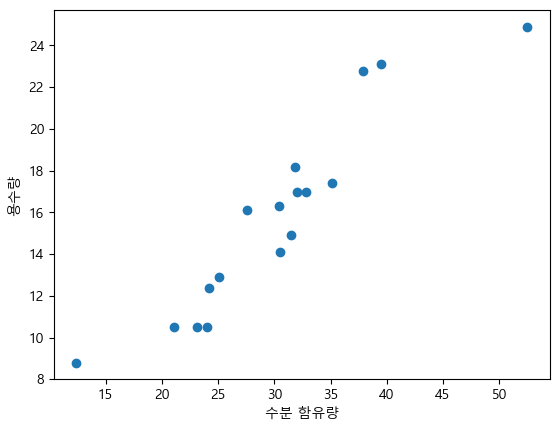

In [15]:
import matplotlib.pyplot as plt

plt.scatter(data.x, data.y)
plt.xlabel('수분 함유량')
plt.ylabel('용수량')
plt.show()

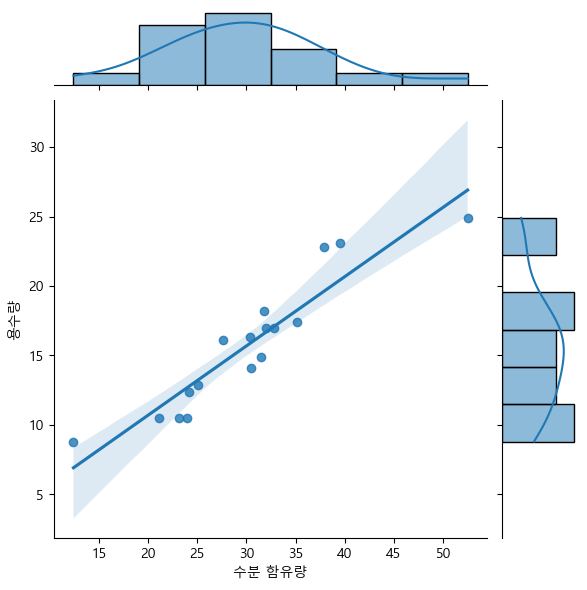

In [13]:
# jointplot
import seaborn as sns

sns.jointplot(x='x', y='y', data=data, kind='reg')
plt.xlabel('수분 함유량')
plt.ylabel('용수량')
plt.show()

#### (b). 피어슨 상관계수, 스피어만의 순위상관계수, 켄달의 타우를 구하고 그 결과를 비교하여라

In [29]:
# 피어슨 상관계수
from scipy.stats import pearsonr
print(data.corr(method='pearson'), '\n')
    
print(pearsonr(data.x, data.y)) # 검정: (상관계수, p-value)

          x         y
x  1.000000  0.933538
y  0.933538  1.000000 

PearsonRResult(statistic=0.9335375436108745, pvalue=4.4647714431406406e-08)


In [26]:
# 스피어만 상관계수
print(data.corr(method='spearman'), '\n')

          x         y
x  1.000000  0.962512
y  0.962512  1.000000 



In [28]:
#  켄달 상관계수
print(data.corr(method='kendall'))

          x         y
x  1.000000  0.880695
y  0.880695  1.000000


#### (c). 모상관계수에 관한 귀무가설 'H0:p=0''에 대하여 검정을 실시하여라.

In [38]:
# 귀무가설: 두 변수 사이에 상관관계가 없다. (p=0)
# 대립가설: 두 변수 사이에 상관관계가 있다. (p!=0)

# 검정통계량: t = r * sqrt((n-2)/(1-r^2))
# 자유도: n-2
# 임계값: t(0.025, n-2)

r = pearsonr(data.x, data.y)[0]
n = len(data)
t1 = r * ((n-2)/(1-r**2))**0.5
print('검정통계량:', t1)

from scipy.stats import t
alpha = 0.05
t_alpha = t.ppf(1-alpha/2, n-2)
print('임계값:', t_alpha)

if abs(t1) > t_alpha:
    print('귀무가설 기각: 두 변수 사이에 상관관계가 있다.')
else:
    print('귀무가설 채택: 두 변수 사이에 상관관계가 없다.')

검정통계량: 10.085859621097802
임계값: 2.131449545559323
귀무가설 기각: 두 변수 사이에 상관관계가 있다.


### 4.

In [77]:
# data
age = [45, 43, 46, 49, 50, 37, 34, 30, 31, 27, 22, 58, 60, 52, 26]
dec = [30, 52, 45, 38, 62, 55, 25, 30, 40, 45, 28, 44, 61, 58, 17]

data = pd.DataFrame({
    'age': age,
    'dec': dec
    })
data

,age,dec
0,45,30
1,43,52
2,46,45
3,49,38
4,50,62
5,37,55
6,34,25
7,30,30
8,31,40
9,27,45


#### (a) 이 데이터를 이용하여 산점도와 표본상관계수 r을 구하여라.

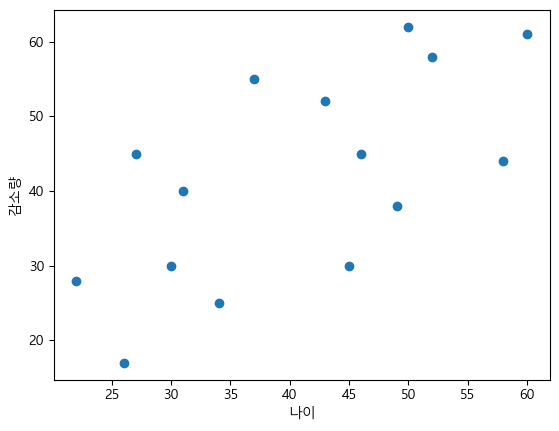

In [78]:
# 산점도
plt.scatter(data.age, data.dec)
plt.xlabel('나이')
plt.ylabel('감소량')
plt.show()

In [79]:
# 표본상관계수
print(data.corr(method='pearson'), '\n')
print(pearsonr(data.age, data.dec))

          age       dec
age  1.000000  0.648275
dec  0.648275  1.000000 

PearsonRResult(statistic=0.6482752789349266, pvalue=0.008951719979073087)


#### (b) 이 데이터에서 27세에서 37세 사이의 5명을 제외한 나머지 10명의 데이터를 이용하여 산점도와 표본상관계수 r을 구하여라

In [80]:
# dataframe sort
data.sort_values('age', inplace=True)
data

,age,dec
10,22,28
14,26,17
9,27,45
7,30,30
8,31,40
6,34,25
5,37,55
1,43,52
0,45,30
2,46,45


In [81]:
# 행 삭제 (2~6)
data = data.drop(data.index[2:7])
data.reset_index(drop=True, inplace=True)
data

,age,dec
0,22,28
1,26,17
2,43,52
3,45,30
4,46,45
5,49,38
6,50,62
7,52,58
8,58,44
9,60,61


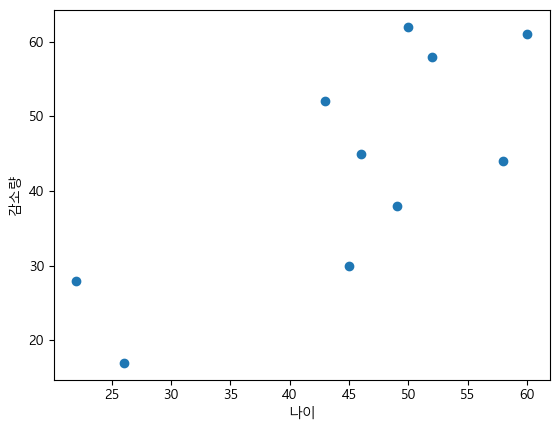

In [75]:
# 산점도
plt.scatter(data.age, data.dec)
plt.xlabel('나이')
plt.ylabel('감소량')
plt.show()

In [76]:
# 표본상관계수
print(data.corr(method='pearson'), '\n')
print(pearsonr(data.age, data.dec))

         age      dec
age  1.00000  0.75751
dec  0.75751  1.00000 

PearsonRResult(statistic=0.7575101482288886, pvalue=0.01115455224706905)


#### (c) (a)와 (b)에서 각각 구한 표본상관계수를 비교하여 설명하여라

- (a)에서 구한 표본상관계수는 0.648275, (b)에서 구한 표본상관계수는 0.75751이다.
- 특정 나이를 제외한 (b)의 상관계수가 (a)보다 더 크다.
- 두 변수(나이와 dec)의 선형 관계가 (b)에서 더 뚜렷하게 나타난다.
- (b)에서의 데이터가 좀 더 일관성이 있기 때문이다.

### 5.

In [82]:
data = pd.read_csv("data\Ex07_05.csv")
data

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,2,1,5,2,4,2,3,5,5,2
1,2,1,1,2,4,2,1,2,2,4,4
2,3,2,2,3,3,3,1,1,2,4,2
3,4,4,4,4,1,5,5,5,4,1,1
4,5,1,2,5,1,5,2,1,5,5,1
5,6,5,5,1,5,1,4,5,2,2,5
6,7,5,5,5,1,4,4,5,5,1,1
7,8,1,1,3,4,3,1,2,3,4,3
8,9,3,3,4,2,5,3,3,5,4,2
9,10,5,4,1,4,2,5,5,1,1,5


In [87]:
def convert(score):
    score = 6 - score

    return score

data.Q4 = data.Q4.apply(convert)
data.Q10 = data.Q10.apply(convert)
data.Q9 = data.Q9.apply(convert)

In [88]:
# 직장에 대한 맍족도
import pingouin as pg
pg.cronbach_alpha(data=data[['Q3', 'Q4', 'Q5', 'Q8', 'Q10']])

(0.9767307490282593, array([0.955, 0.99 ]))

In [89]:
# 직업에 대한 적극적 태도
pg.cronbach_alpha(data=data[['Q1', 'Q2', 'Q6', 'Q7', 'Q9']])

(0.9641145385277129, array([0.93 , 0.984]))